# Statistical Modeling

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from scripts.data_processing import DataProcessing
from scripts.model import Modelling

In [3]:
import pandas as pd
insurance_df = pd.read_csv('data\\insurance_data.csv',low_memory=False)

In [4]:
# instanciate
processor=DataProcessing()
model=Modelling()

## Data Preparation

**Because of computational capacity we reduce the columns and rows to lower numbers**

In [5]:
# insurance_df_minimized=insurance_df[['Gender','VehicleType','make','Model','VehicleIntroDate','Rebuilt','CoverType','CoverCategory','TotalPremium','TotalClaims']]
insurance_df_minimized=insurance_df
insurance_df_minimized = insurance_df_minimized.drop(insurance_df_minimized.index[50000:])

### Replace Outliers

In [6]:
insurance_df.drop('NumberOfVehiclesInFleet', axis=1, inplace=True)
insurance_df_cleaned=processor.replace_outliers_with_mean(insurance_df_minimized)

In [7]:
insurance_df_cleaned

,PolicyID,TransactionMonth,LegalType,Title,Language,AccountType,MaritalStatus,Gender,Province,PostalCode,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,12827,2015-03-01 00:00:00,Close Corporation,Mr,English,Current account,Not specified,Not specified,Gauteng,1459,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,12827,2015-05-01 00:00:00,Close Corporation,Mr,English,Current account,Not specified,Not specified,Gauteng,1459,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,12827,2015-07-01 00:00:00,Close Corporation,Mr,English,Current account,Not specified,Not specified,Gauteng,1459,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,12827,2015-05-01 00:00:00,Close Corporation,Mr,English,Current account,Not specified,Not specified,Gauteng,1459,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,12827,2015-07-01 00:00:00,Close Corporation,Mr,English,Current account,Not specified,Not specified,Gauteng,1459,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,338,2014-09-01 00:00:00,Individual,Mr,English,Current account,Not specified,Male,Gauteng,1980,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49996,338,2014-11-01 00:00:00,Individual,Mr,English,Current account,Not specified,Male,Gauteng,1980,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49997,338,2015-01-01 00:00:00,Individual,Mr,English,Current account,Not specified,Male,Gauteng,1980,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49998,6641,2015-02-01 00:00:00,Individual,Mr,English,Current account,Not specified,Male,Gauteng,2000,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0


In [8]:
insurance_df_minimized

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2791,338,2014-09-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49996,2791,338,2014-11-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49997,2791,338,2015-01-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
49998,92098,6641,2015-02-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0


### Replace Missing Values

In [9]:
insurance_df_cleaned=processor.replace_missing_with_mean_or_mode(insurance_df_cleaned)
# insurance_df_cleaned.drop('NumberOfVehiclesInFleet', axis=1)

In [10]:
total_nan = insurance_df_cleaned.isnull().sum().sum()
print(total_nan)

100000


In [12]:
insurance_df_cleaned.drop('CrossBorder', axis=1, inplace=True)


In [15]:
insurance_df_cleaned.drop('NumberOfVehiclesInFleet', axis=1, inplace=True)

In [16]:
total_nan = insurance_df_cleaned.isnull().sum().sum()
print(total_nan)

0


In [17]:
column_with_most_nan = insurance_df_cleaned.isnull().sum().idxmax()
nan_count = insurance_df_cleaned.isnull().sum().max()

print(f"Column with the most NaN values: {column_with_most_nan} ({nan_count} NaNs)")

Column with the most NaN values: PolicyID (0 NaNs)


### Identify Numerical and Catagorical columns

In [18]:
numerical_columns,categorical_columns=processor.catagorize_columns(insurance_df_cleaned)

### Encode Catagorical columns

In [19]:
columns_label=[]
columns_onehot = categorical_columns
df_label = processor.encoder('oneHotEncoder', insurance_df_cleaned, columns_label, columns_onehot)

### Scale Numerical columns

In [20]:
columns_scaler = numerical_columns
df_scaled = processor.scaler('minMaxScaler', df_label, columns_scaler)

In [21]:
total_nan = df_label.isnull().sum().sum()
print(total_nan)

0


### Split the data

In [22]:
# Split the data
X = df_scaled.drop(['TotalPremium','TotalClaims'], axis=1)
y = df_scaled['TotalClaims']
X_train, X_test, y_train, y_test = model.split_data(X, y)

### Train Model

In [23]:
# Train models
lr_model, dt_model, rfr_model, xgb_model = model.train_models(X_train, y_train)


### Evaluate Models

In [24]:
# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for Model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = model.evaluate_model(Model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [26]:
r2_scores

[-1.1577697691720167e+20,
 -1.7180613634921262,
 -0.48330341047514547,
 -0.6064870477634692]

In [28]:
mae_scores

[np.float64(1476610.5639358892),
 np.float64(0.00040262525811807757),
 np.float64(0.00038928603656303637),
 np.float64(0.00044031994726787785)]

### Plot Metrics

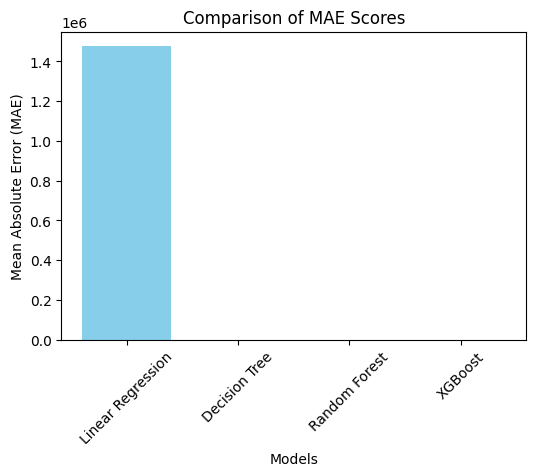

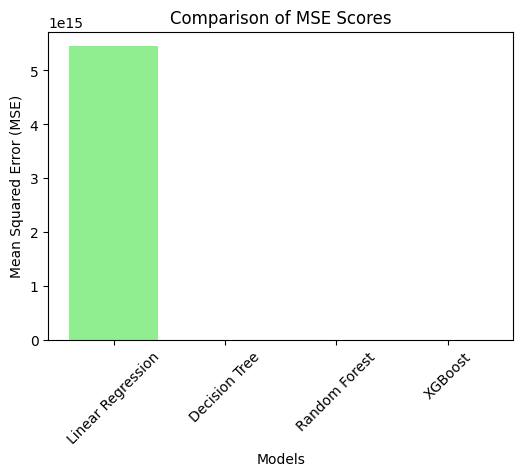

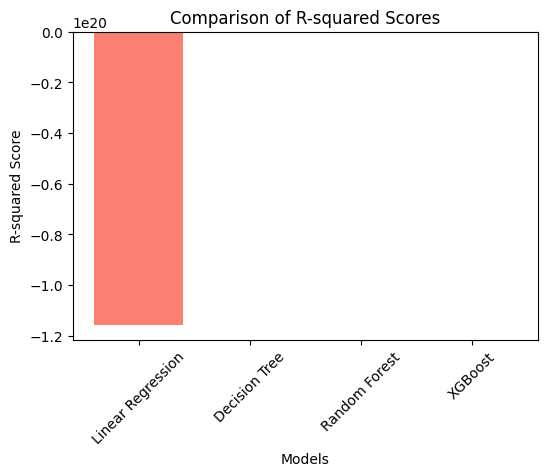

In [25]:
# Plot metrics
model.plot_metrics(models, mae_scores, mse_scores, r2_scores)